In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py, glob
import pandas as pd

from scipy.stats import ks_2samp
from ang_res_funcs import *

In [2]:
PARENT_DIRECTORY = '/data/ana/CosmicRay/Anisotropy/IceTop/twelve_year/03_sim_study'
DIRECTS = [f'{PARENT_DIRECTORY}/IT81-2012_orig', f'{PARENT_DIRECTORY}/IT81-2012', f'{PARENT_DIRECTORY}/IT81-2015', f'{PARENT_DIRECTORY}/IT81-2018']
COLORS = ['black', 'green', 'blue', 'red']
LABELS = ['2012 No simweights', '2012', '2015', '2018']

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.30261450e-04 1.89625740e-04 3.41415707e-04 4.91467479e-04
 6.88497661e-04 7.93979268e-04 1.83164746e-03 1.80862881e-03
 1.67953117e-03 1.39023627e-03 1.07445558e-03 7.71307002e-04
 5.19650108e-04 3.39801620e-04 2.19934661e-04 1.38049939e-04
 1.16580238e-04 7.49240998e-05 4.85602313e-05 3.11945957e-05
 2.04978890e-05 1.35253841e-05 8.64555903e-06 5.59040937e-06
 3.58572067e-06]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.03441807e-04 2.96156717e-04 5.33221674e-04 7.67571928e-04
 1.07529287e-03 1.24003362e-03 1.76601946e-03 1.74382557e-03
 1.61935350e-03 1.34042405e-03 1.03595779e-03 7.43671041e-04
 5.01031024e-04 3.27858496e-04 2.12054394e-04 1.33103604e-04
 1.31746380e-04 8.46711167e-05 5.48775230e-05 3.52422527e-05
 2.31809467e-05 1.52849268e-05 9.77027604e-06 6.31767623e-06
 4.05493302e-06]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.60864496e-04 6.749

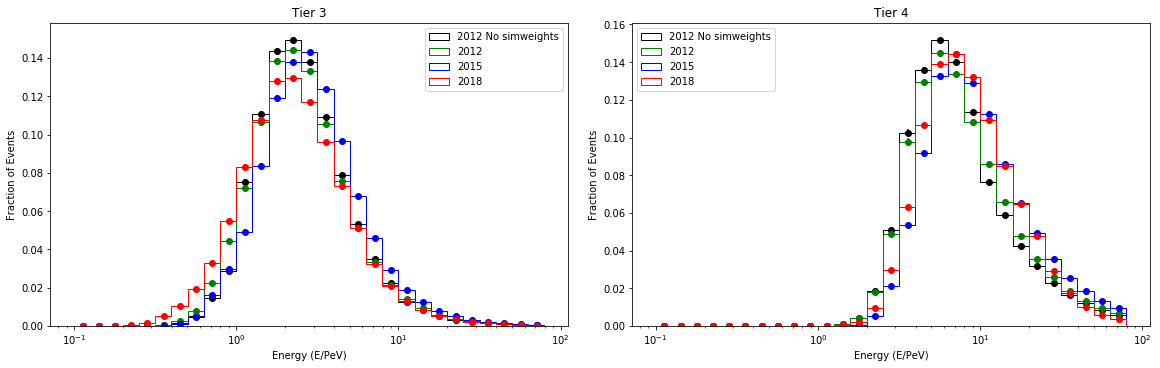

KS Test Results for Tier 3:
Between 2012 No simweights and 2012: p-value = 0.9999999821443393
Between 2012 No simweights and 2015: p-value = 0.9999999821443393
Between 2012 No simweights and 2018: p-value = 0.9984782925008956
Between 2012 and 2015: p-value = 0.9999999821443393
Between 2012 and 2018: p-value = 0.9984782925008956
Between 2015 and 2018: p-value = 0.9514369595559768

KS Test Results for Tier 4:
Between 2012 No simweights and 2012: p-value = 0.9999999821443393
Between 2012 No simweights and 2015: p-value = 0.9999999821443393
Between 2012 No simweights and 2018: p-value = 0.9999999821443393
Between 2012 and 2015: p-value = 0.9999999821443393
Between 2012 and 2018: p-value = 0.9999999821443393
Between 2015 and 2018: p-value = 0.9999999821443393


In [3]:
histograms = plt.figure(figsize=(16, 5), constrained_layout=True)
hist_array = histograms.subplots(1, 2, squeeze=False)

hist_array[0,0].set_title('Tier 3')
hist_array[0,0].semilogx()
hist_array[0,0].set_ylabel('Fraction of Events')
hist_array[0,0].set_xlabel('Energy (E/PeV)')

hist_array[0,1].set_title('Tier 4')
hist_array[0,1].semilogx()
hist_array[0,1].set_ylabel('Fraction of Events')
hist_array[0,1].set_xlabel('Energy (E/PeV)')

# Initialize lists to store data for KS test
all_hist_t3 = []
all_hist_t4 = []

for i, DIRECT in enumerate(DIRECTS):       
    mc_en_p_t3 = np.load(DIRECT +'/Proton-T3-MC-Energy.npy')
    mc_en_he_t3 = np.load(DIRECT +'/Helium-T3-MC-Energy.npy')
    mc_en_o_t3 = np.load(DIRECT +'/Oxygen-T3-MC-Energy.npy')
    mc_en_fe_t3 = np.load(DIRECT +'/Iron-T3-MC-Energy.npy')
    
    mc_en_p_t4 = np.load(DIRECT +'/Proton-T4-MC-Energy.npy')
    mc_en_he_t4 = np.load(DIRECT +'/Helium-T4-MC-Energy.npy')
    mc_en_o_t4 = np.load(DIRECT +'/Oxygen-T4-MC-Energy.npy')
    mc_en_fe_t4 = np.load(DIRECT +'/Iron-T4-MC-Energy.npy')
    
    mc_w_p_t3 = np.load(DIRECT +'/Proton-T3-MC-Weights.npy')
    mc_w_he_t3 = np.load(DIRECT +'/Helium-T3-MC-Weights.npy')
    mc_w_o_t3 = np.load(DIRECT +'/Oxygen-T3-MC-Weights.npy')
    mc_w_fe_t3 = np.load(DIRECT +'/Iron-T3-MC-Weights.npy')
    
    mc_w_p_t4 = np.load(DIRECT +'/Proton-T4-MC-Weights.npy')
    mc_w_he_t4 = np.load(DIRECT +'/Helium-T4-MC-Weights.npy')
    mc_w_o_t4 = np.load(DIRECT +'/Oxygen-T4-MC-Weights.npy')
    mc_w_fe_t4 = np.load(DIRECT +'/Iron-T4-MC-Weights.npy')
    
    mc_en_t3 = np.concatenate((mc_en_p_t3, mc_en_he_t3, mc_en_o_t3, mc_en_fe_t3), axis=None)
    mc_en_t4 = np.concatenate((mc_en_p_t4, mc_en_he_t4, mc_en_o_t4, mc_en_fe_t4), axis=None)
    
    mc_w_t3 = np.concatenate((mc_w_p_t3, mc_w_he_t3, mc_w_o_t3, mc_w_fe_t3), axis=None)
    mc_w_t4 = np.concatenate((mc_w_p_t4, mc_w_he_t4, mc_w_o_t4, mc_w_fe_t4), axis=None)

    bins = 10**(np.arange(-1,2,.1))
    scale = 10**-6
    
    hist_t3, bin_edges_t3 = np.histogram(mc_en_t3 * scale, bins=bins, weights=mc_w_t3 / sum(mc_w_t3))
    bin_centers_t3 = (bin_edges_t3[:-1] + bin_edges_t3[1:]) / 2
    all_hist_t3.append(hist_t3)

    weighted_uncertainty_t3 = np.sqrt(np.histogram(mc_en_t3 * scale, bins=bins, weights=(mc_w_t3 / sum(mc_w_t3))**2)[0])

    print(weighted_uncertainty_t3)
    
    hist_array[0,0].hist(mc_en_t3*scale, bins, weights=mc_w_t3/sum(mc_w_t3), histtype="step", linestyle="solid", color=COLORS[i], label=LABELS[i])
    hist_array[0, 0].errorbar(bin_centers_t3, hist_t3, yerr=weighted_uncertainty_t3, fmt='o', color=COLORS[i])      
    hist_array[0,0].legend(loc='upper right')

    hist_t4, bin_edges_t4 = np.histogram(mc_en_t4 * scale, bins=bins, weights=mc_w_t4 / sum(mc_w_t4))    
    bin_centers_t4 = (bin_edges_t4[:-1] + bin_edges_t4[1:]) / 2
    all_hist_t4.append(hist_t4)

    weighted_uncertainty_t4 = np.sqrt(np.histogram(mc_en_t4*scale, bins=bins, weights=(mc_w_t4 / sum(mc_w_t4))**2)[0])
    
    hist_array[0,1].hist(mc_en_t4*scale, bins, weights=mc_w_t4/sum(mc_w_t4), histtype="step", linestyle="solid", color=COLORS[i], label=LABELS[i])
    hist_array[0, 1].errorbar(bin_centers_t4, hist_t4, yerr=weighted_uncertainty_t4, fmt='o', color=COLORS[i])      
    hist_array[0,1].legend(loc='upper left')
    
    if i == len(DIRECTS) - 1:
        plt.show()

# KS test for Tier 3
print("KS Test Results for Tier 3:")
for i in range(len(DIRECTS)):
    for j in range(i + 1, len(DIRECTS)):
        ks_stat, p_value = ks_2samp(all_hist_t3[i], all_hist_t3[j])
        print(f"Between {LABELS[i]} and {LABELS[j]}: p-value = {p_value}")

print()

# KS test for Tier 4
print("KS Test Results for Tier 4:")
for i in range(len(DIRECTS)):
    for j in range(i + 1, len(DIRECTS)):
        ks_stat, p_value = ks_2samp(all_hist_t4[i], all_hist_t4[j])
        print(f"Between {LABELS[i]} and {LABELS[j]}: p-value = {p_value}")
